In [41]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage

from numpy import genfromtxt
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

%matplotlib inline

In [42]:
sentences_cluster0 = pd.read_csv("../data/processed/cluster0_results.csv")
sentences_cluster1 = pd.read_csv("../data/processed/cluster2_results.csv")

In [43]:
index_list = (list(sentences_cluster0['Unnamed: 0']) + list(sentences_cluster1['Unnamed: 0']))

In [45]:
index_list.sort()

In [28]:
sentences = pd.read_csv("../data/processed/temple_radio_sentences.csv", header=None)

In [47]:
sentences = sentences.loc[index_list]

In [48]:
sent_embeddings = genfromtxt('../data/processed/temple_radio_sentence_embeddings.csv', delimiter=',')

In [62]:
sent_embeddings = sent_embeddings[index_list, :]

In [66]:
num_clusters = 3
model = AgglomerativeClustering(n_clusters=num_clusters)
model = model.fit(sent_embeddings)

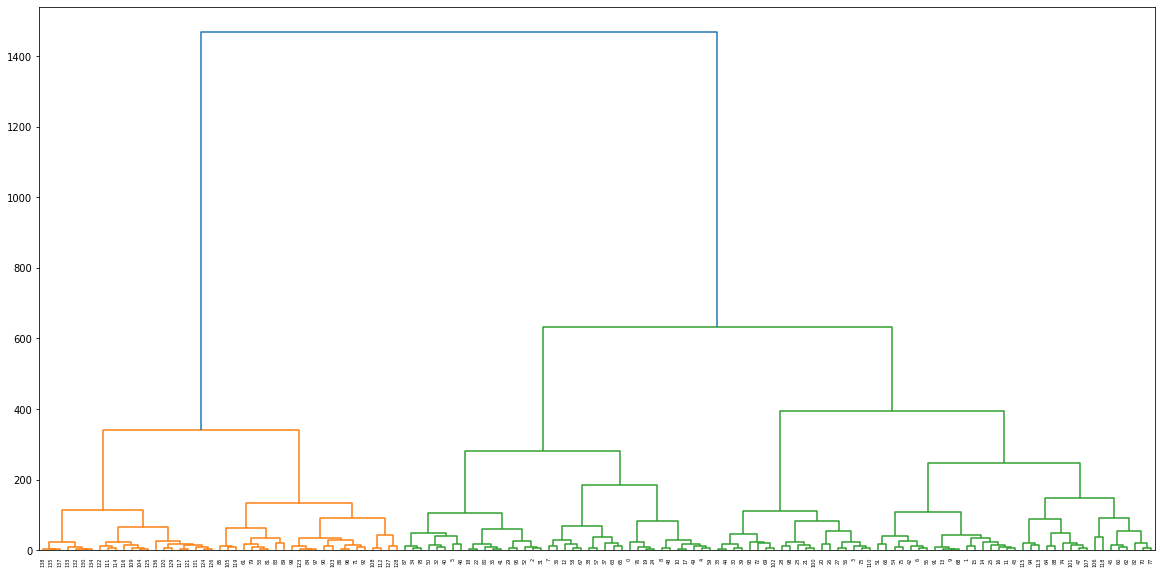

In [67]:
Z = hierarchy.linkage(model.children_, 'ward')
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(Z)

In [68]:
df_clusters = pd.DataFrame(list(zip(list(sentences[0]), model.labels_)), columns=['Sentence', 'Cluster'])

In [7]:
df_clusters.to_csv('../data/processed/temple_clustering_results_part2.csv')

In [69]:
print(f"Cluster 0: {len(df_clusters[df_clusters.Cluster == 0])}")
print(f"Cluster 1: {len(df_clusters[df_clusters.Cluster == 1])}")
print(f"Cluster 2: {len(df_clusters[df_clusters.Cluster == 2])}")

Cluster 0: 22
Cluster 1: 43
Cluster 2: 75


In [70]:
df_clusters[df_clusters.Cluster == 0].to_csv('../data/processed/cluster0_temple_results_part2.csv')
df_clusters[df_clusters.Cluster == 1].to_csv('../data/processed/cluster1_temple_results_part2.csv')
df_clusters[df_clusters.Cluster == 2].to_csv('../data/processed/cluster2_temple_results_part2.csv')